# Pricing exotic payoff with Monte Carlo methods

In [1]:
import fineng_irfx as fe
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
BM = fe.L4_BoxMuller(1)

In [3]:
class price_barrier:
    def __init__(self, r, sigma, T, m, K, Bup, Bdown, isCall, RNG, isKO):
        self.r = r
        self.sigma = sigma
        self.T = T
        self.m = m
        self.K = K
        self.Bup = Bup
        self.Bdown = Bdown
        self.isCall = isCall
        self.RNG = RNG
        if isKO:
            self.DB = fe.L4_DoubleBarrierKO(T, m, K, Bup, Bdown, isCall)
        else:
            self.DB = fe.L4_DoubleBarrierKI(T, m, K, Bup, Bdown, isCall)
        
    def price(self, S0, path_count):
        self.BSModel = fe.L4_BSModel(S0, self.r, self.sigma, self.RNG)
        return self.DB.PriceByMC(self.BSModel, path_count)

In [4]:
r = 0.05
sigma = 0.2
T = 5.0
m = 100
K = 100
Bup = 130
Bdown = 70

DBKO_call = price_barrier(r, sigma, T, m, K, Bup, Bdown, True, BM, True)
DBKO_put = price_barrier(r, sigma, T, m, K, Bup, Bdown, False, BM, True)

DBKI_call = price_barrier(r, sigma, T, m, K, Bup, Bdown, True, BM, False)
DBKI_put = price_barrier(r, sigma, T, m, K, Bup, Bdown, False, BM, False)

In [5]:
path_count = 50000

KO_call_prices = []
KO_put_prices = []

KI_call_prices = []
KI_put_prices = []

S0_list = np.linspace(50, 150, 100)

for S0 in S0_list:
    KO_call_prices.append(DBKO_call.price(S0, path_count))
    KO_put_prices.append(DBKO_put.price(S0, path_count))
    KI_call_prices.append(DBKI_call.price(S0, path_count))
    KI_put_prices.append(DBKI_put.price(S0, path_count))

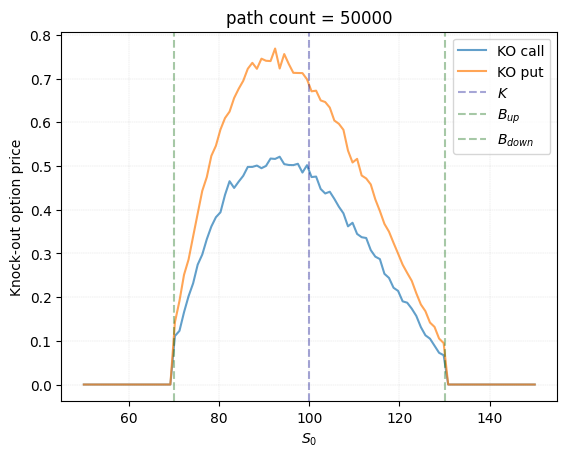

In [6]:
plt.figure()
plt.title(f"path count = {path_count}")
plt.plot(S0_list, KO_call_prices, label='KO call', alpha=0.7, linewidth=1.5)
plt.plot(S0_list, KO_put_prices, label='KO put', alpha=0.7, linewidth=1.5)
plt.axvline(
    x=K, color="darkblue", linestyle="--", label=r"$K$", alpha=0.35, linewidth=1.5
)
plt.axvline(
    x=Bup, color="darkgreen", linestyle="--", label=r"$B_{up}$", alpha=0.35, linewidth=1.5
)
plt.axvline(
    x=Bdown, color="darkgreen", linestyle="--", label=r"$B_{down}$", alpha=0.35, linewidth=1.5
)
plt.legend()
plt.grid(color="grey", linewidth=0.3, linestyle="--", alpha=0.3)
plt.xlabel(r"$S_0$")
plt.ylabel(r"Knock-out option price")
plt.show()

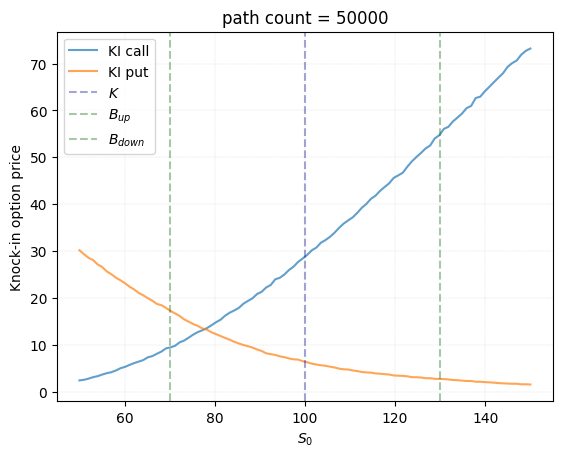

In [7]:
plt.figure()
plt.title(f"path count = {path_count}")
plt.plot(S0_list, KI_call_prices, label='KI call', alpha=0.7, linewidth=1.5)
plt.plot(S0_list, KI_put_prices, label='KI put', alpha=0.7, linewidth=1.5)
plt.axvline(
    x=K, color="darkblue", linestyle="--", label=r"$K$", alpha=0.35, linewidth=1.5
)
plt.axvline(
    x=Bup, color="darkgreen", linestyle="--", label=r"$B_{up}$", alpha=0.35, linewidth=1.5
)
plt.axvline(
    x=Bdown, color="darkgreen", linestyle="--", label=r"$B_{down}$", alpha=0.35, linewidth=1.5
)
plt.legend()
plt.grid(color="grey", linewidth=0.3, linestyle="--", alpha=0.3)
plt.xlabel(r"$S_0$")
plt.ylabel(r"Knock-in option price")
plt.show()